This notebook tests if the datassets created by the create_waveform_dataset_test.py are working

by Hiroto Bito (hbito@uw.edu)

References:
-  https://github.com/niyiyu/PNW-ML/blob/main/scripts/mpi_extract_comcat_acceleration.py



In [1]:
import os
import logging
from obspy.clients.fdsn import Client
import numpy as np
import obspy
from obspy import Stream
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta
import pandas as pd
import h5py
from tqdm import tqdm
from itertools import islice
import random
# from pnwstore.mseed import WaveformClient

## Verify the test datasets

### Verify the test datasets for HH/BH

Keys in HDF5 file:
 - data
<KeysViewHDF5 ['0', '1', '10', '2', '3', '4', '5', '6', '7', '8', '9']>
 - 0: shape=(35313, 3, 15000), min=-14818799.00, max=20172668.00
 - 1: shape=(35390, 3, 15000), min=-54504812.00, max=55430056.00
 - 10: shape=(35017, 3, 15000), min=-13449799.00, max=35018108.00
 - 2: shape=(35219, 3, 15000), min=-13086791.00, max=34858204.00
 - 3: shape=(35293, 3, 15000), min=-58972296.00, max=56252216.00
 - 4: shape=(35325, 3, 15000), min=-15283499.00, max=34930492.00
 - 5: shape=(35353, 3, 15000), min=-14462589.00, max=35254620.00
 - 6: shape=(35489, 3, 15000), min=-10783920.00, max=8290507.00
 - 7: shape=(35525, 3, 15000), min=-7661943.50, max=29021552.00
 - 8: shape=(35805, 3, 15000), min=-8568857.00, max=34916284.00
 - 9: shape=(35103, 3, 15000), min=-34148324.00, max=34911104.00
samplewaveform shape: (3, 15000)


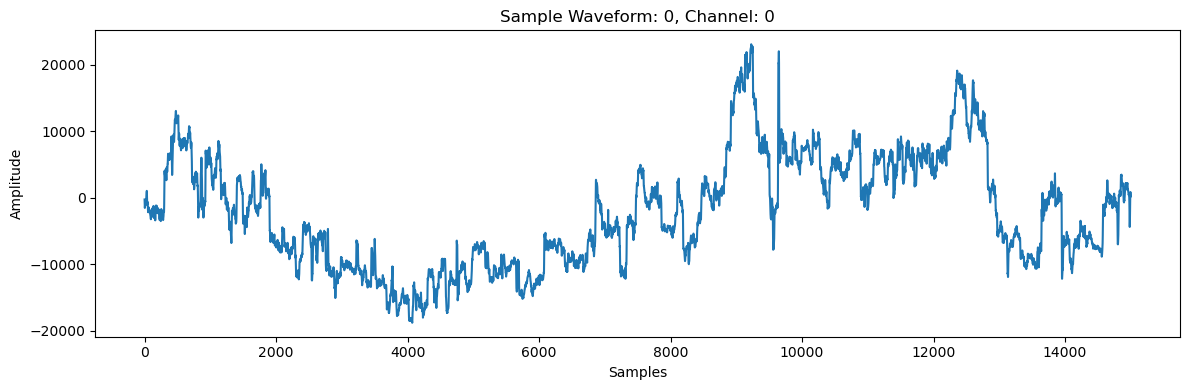

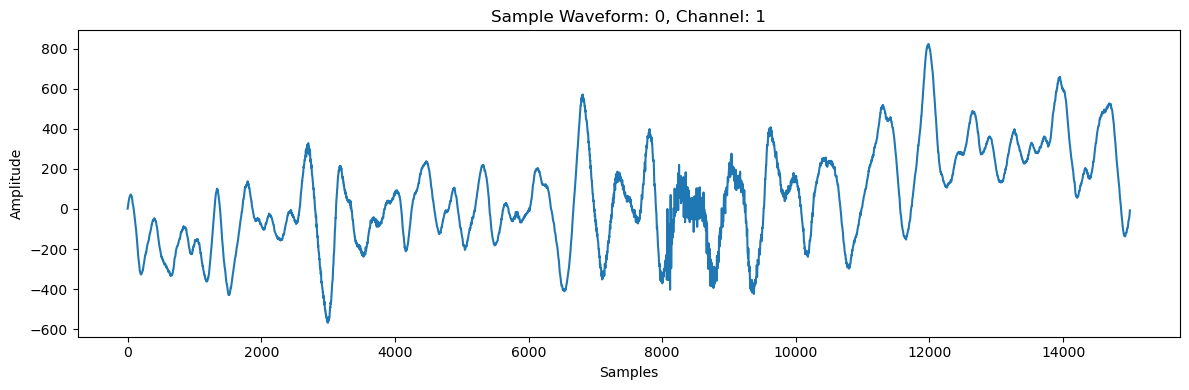

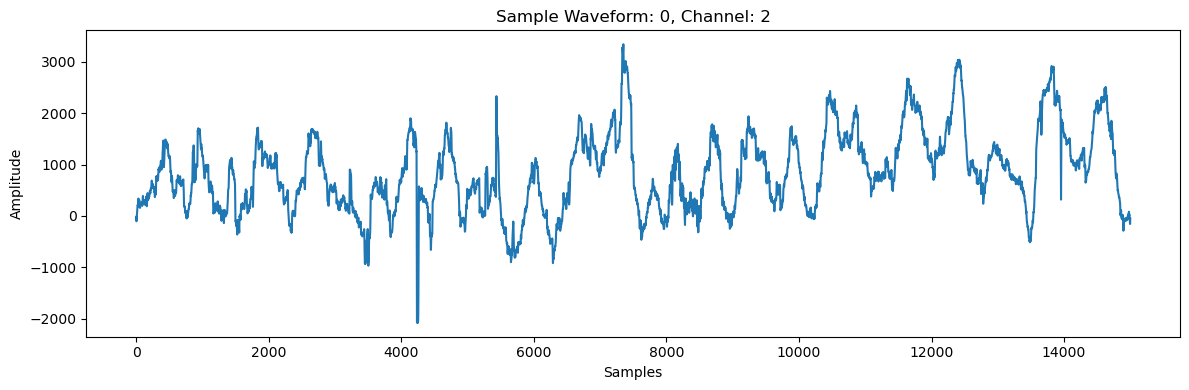

samplewaveform shape: (3, 15000)


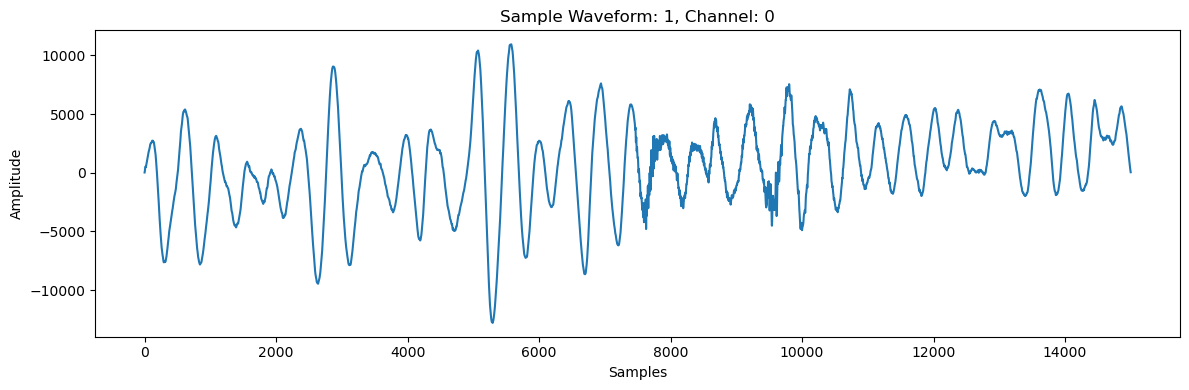

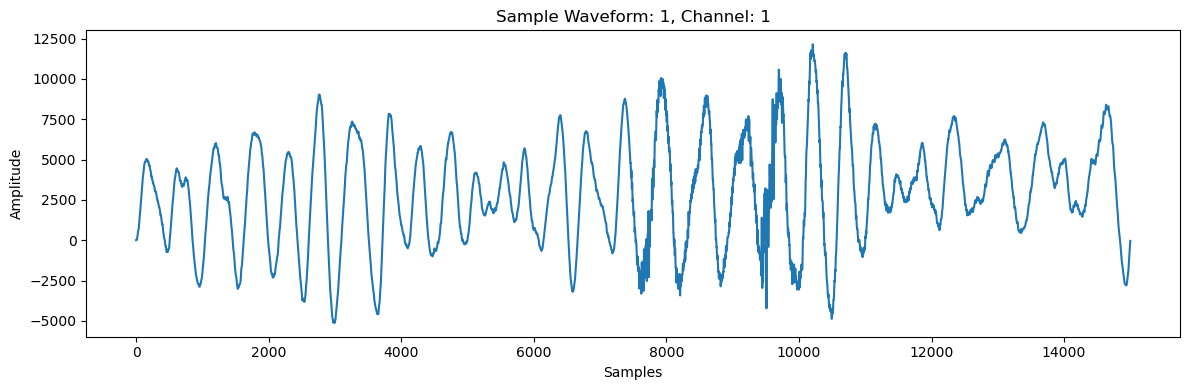

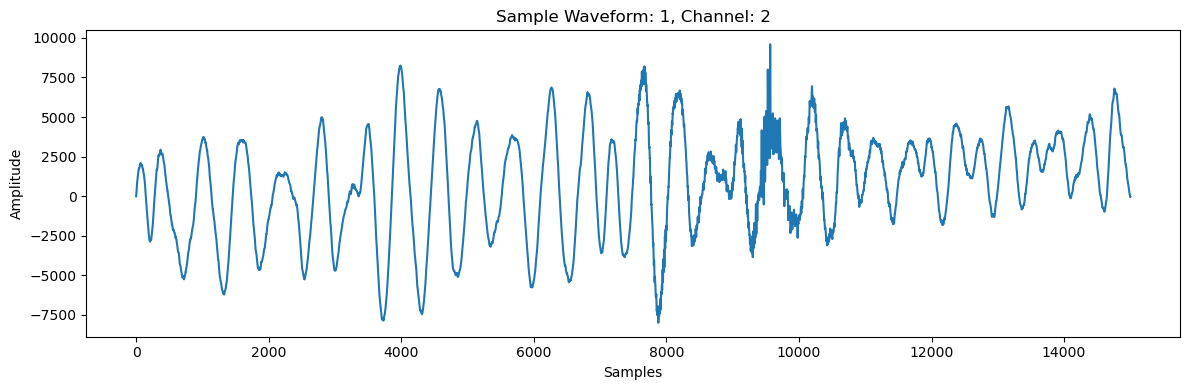

samplewaveform shape: (3, 15000)


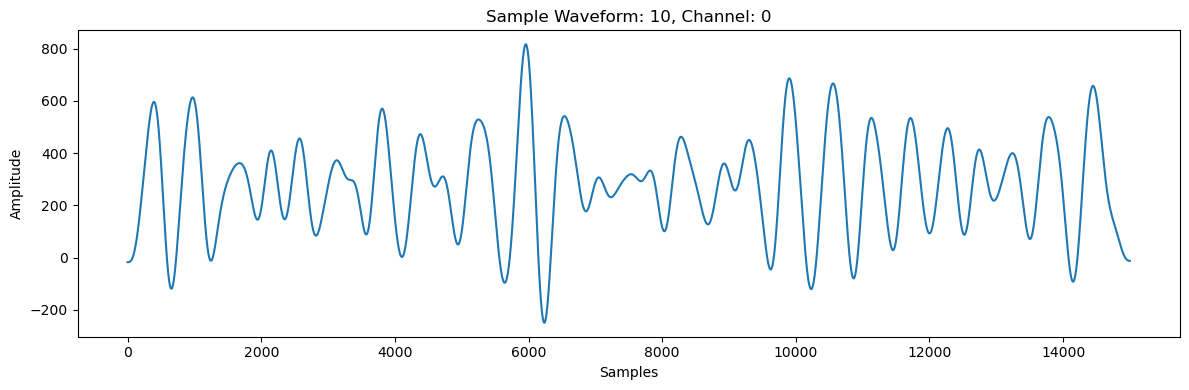

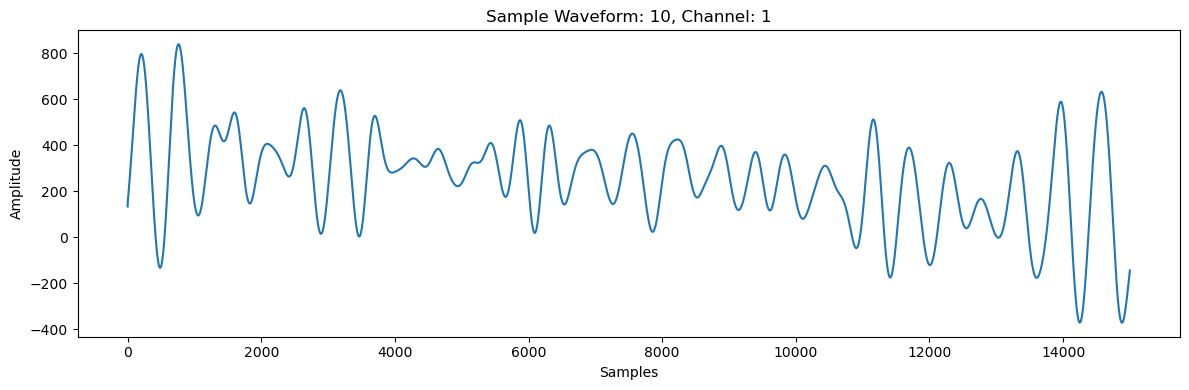

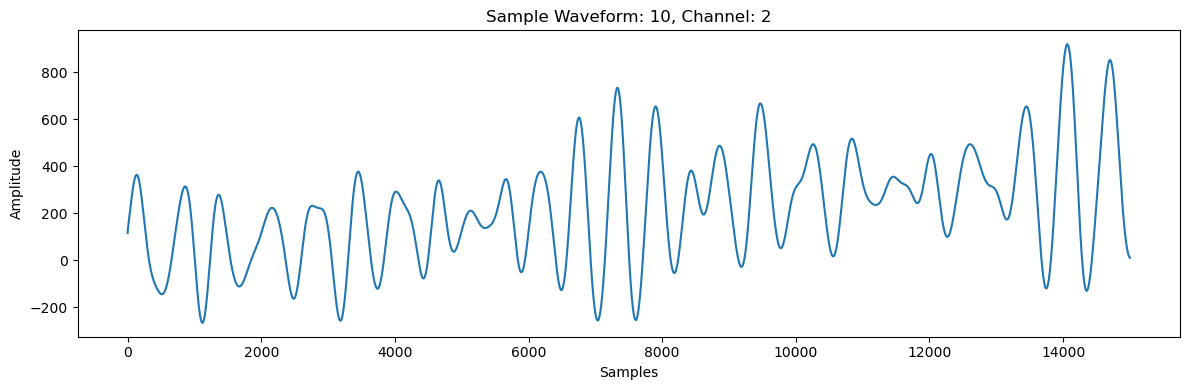

samplewaveform shape: (3, 15000)


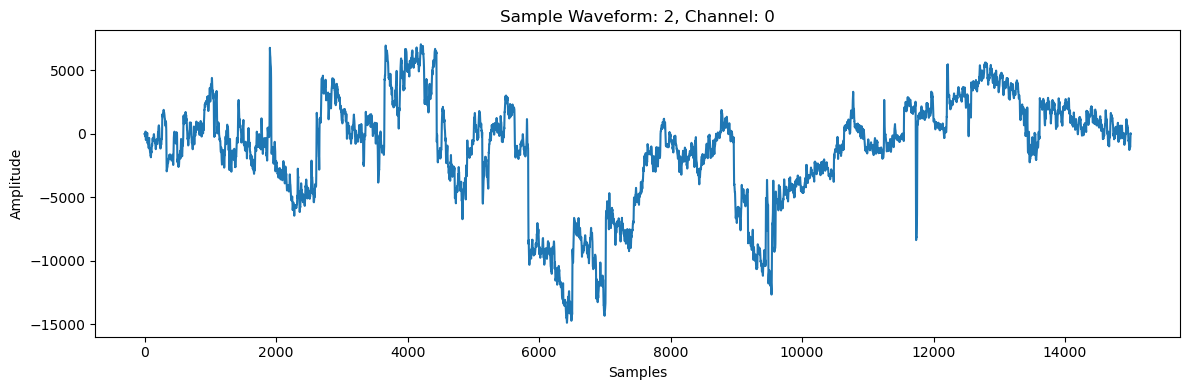

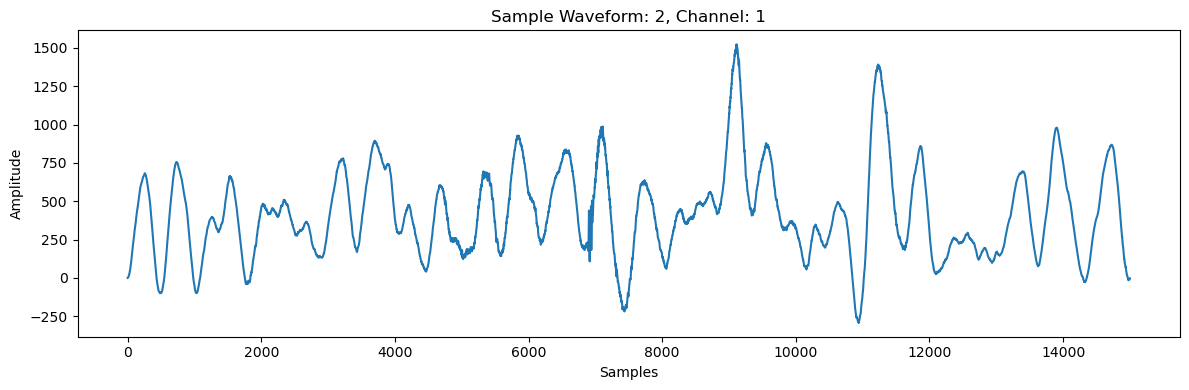

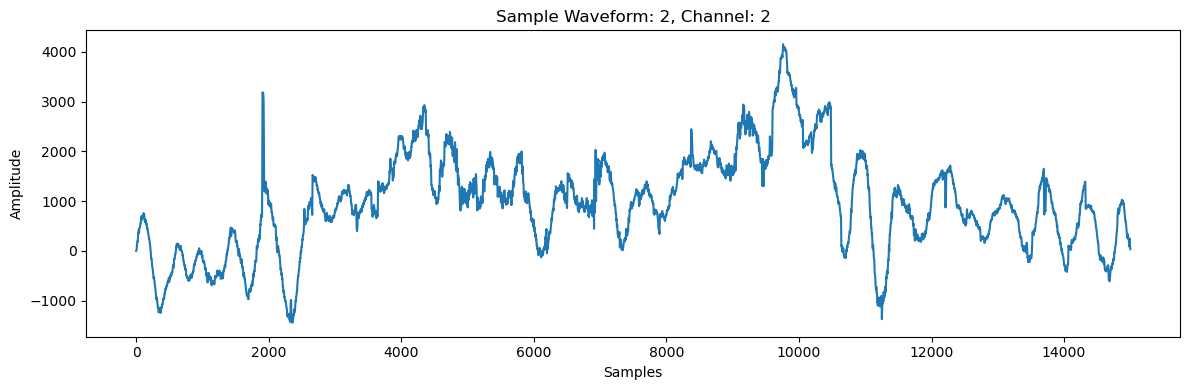

samplewaveform shape: (3, 15000)


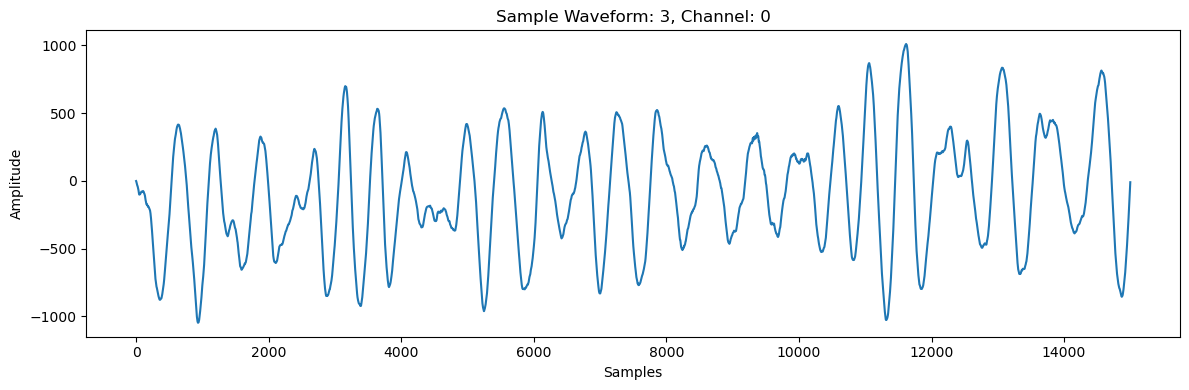

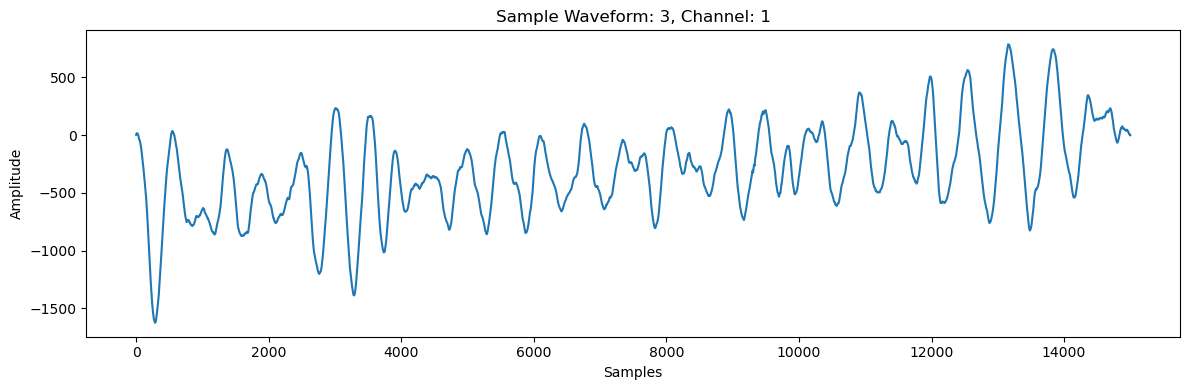

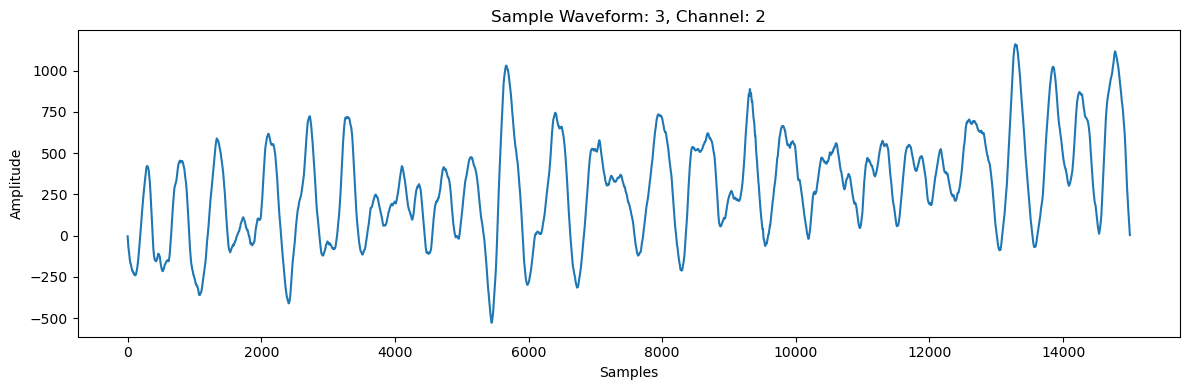

samplewaveform shape: (3, 15000)


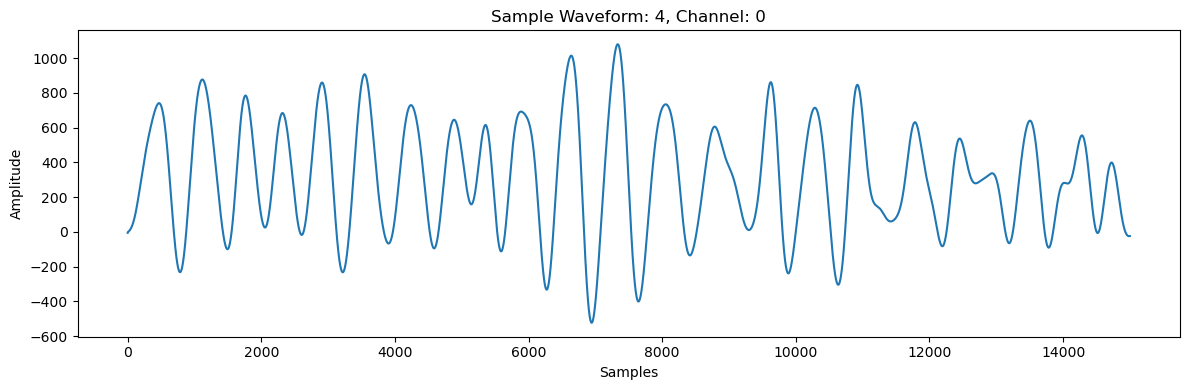

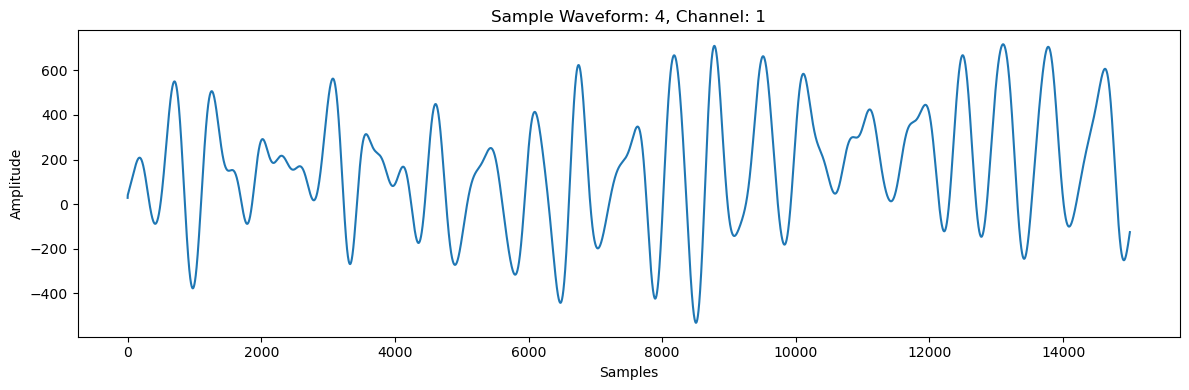

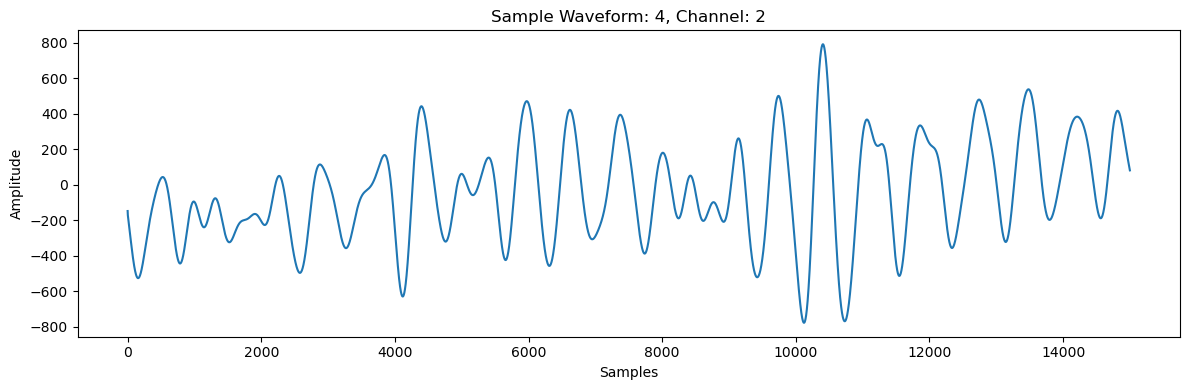

samplewaveform shape: (3, 15000)


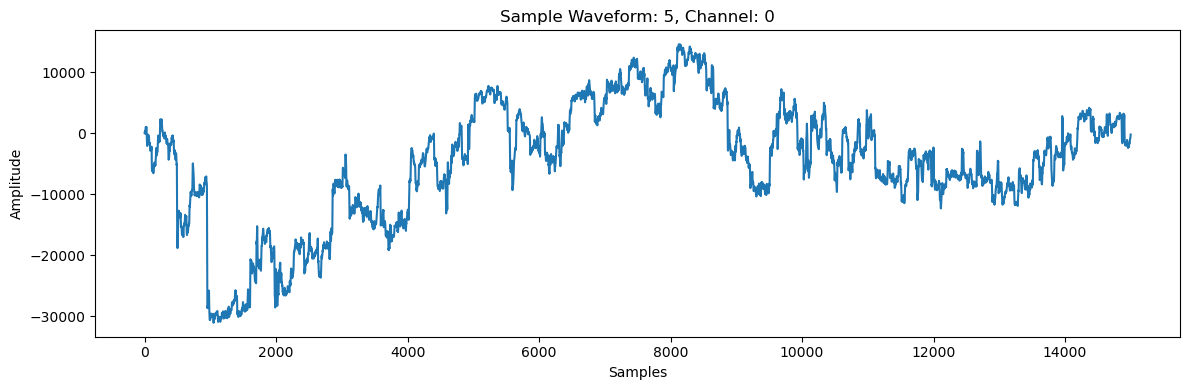

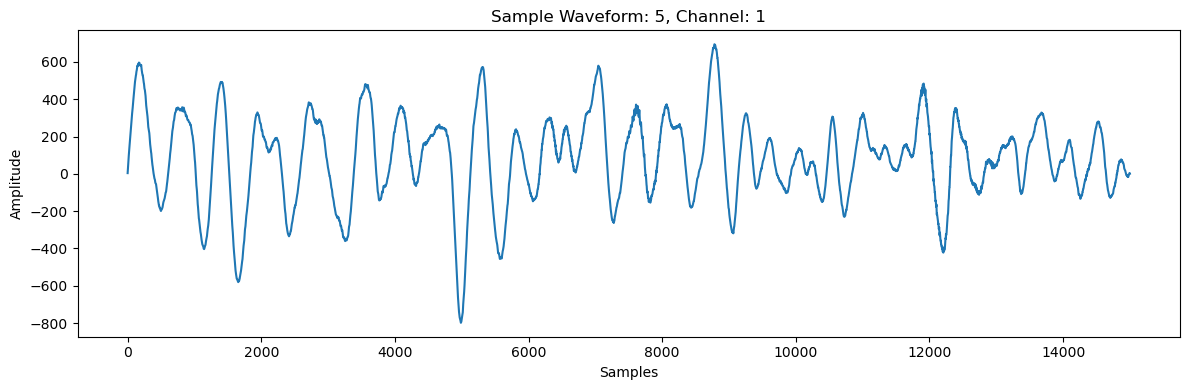

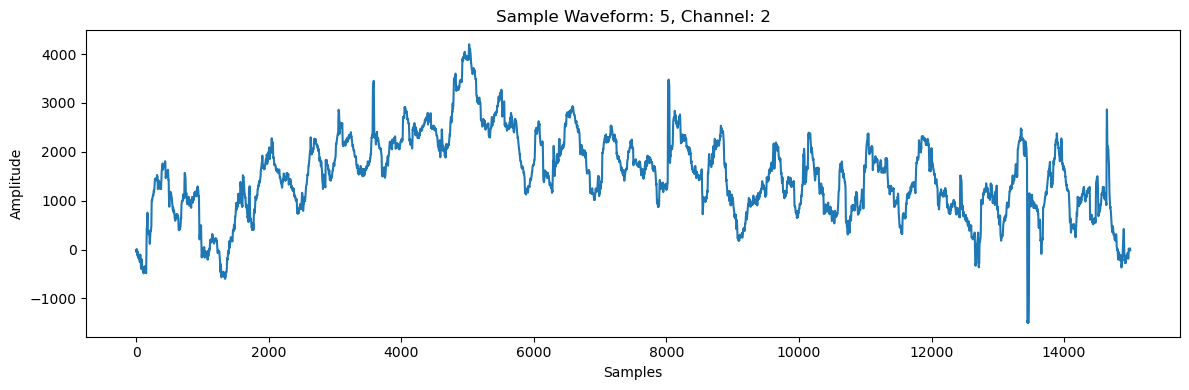

samplewaveform shape: (3, 15000)


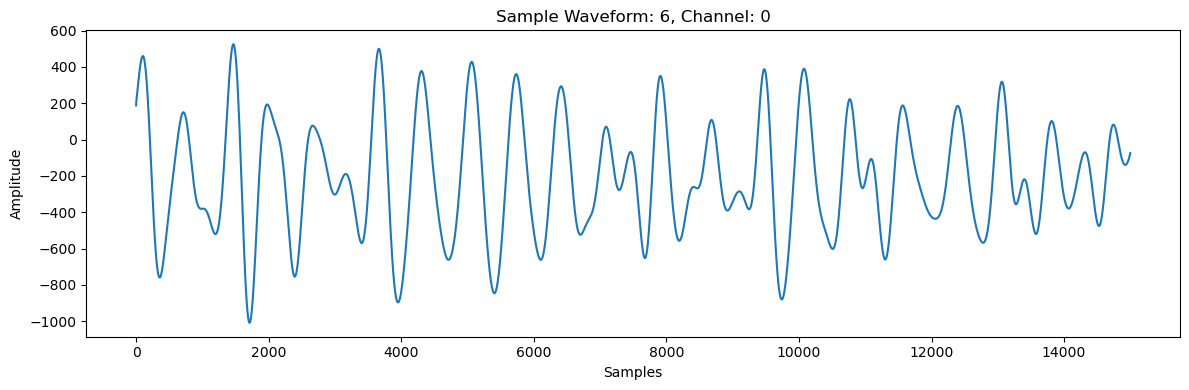

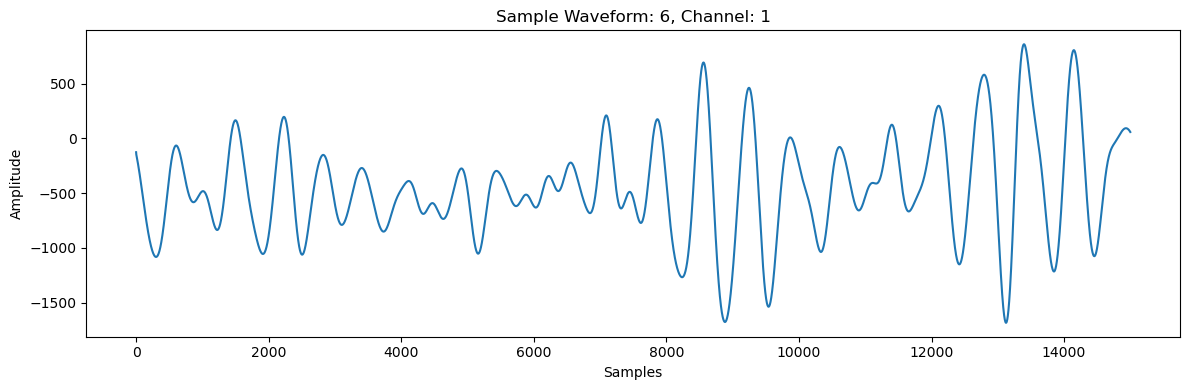

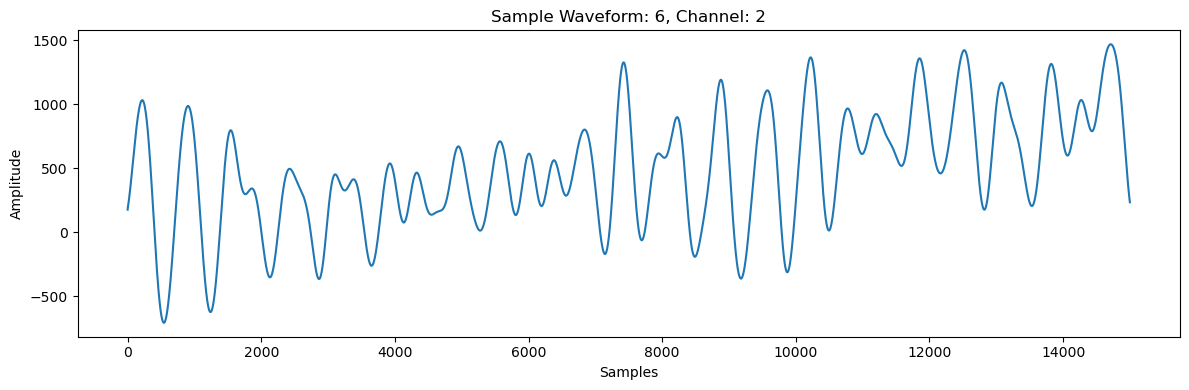

samplewaveform shape: (3, 15000)


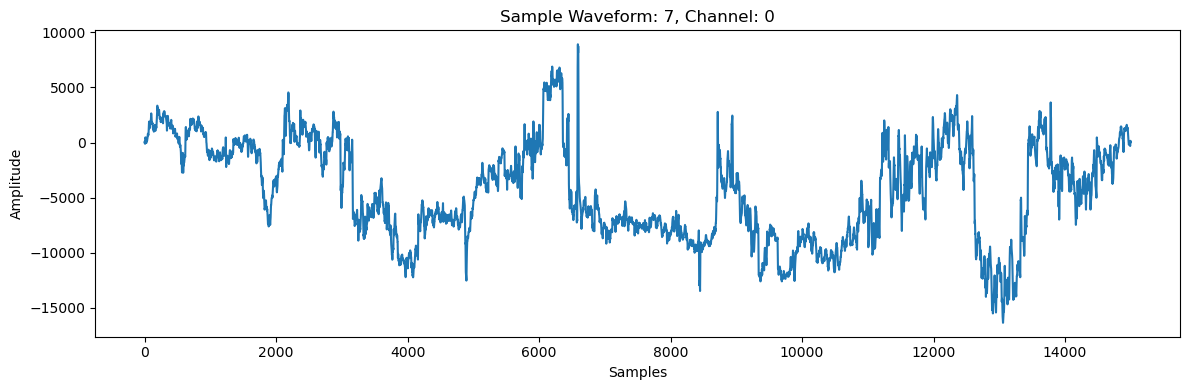

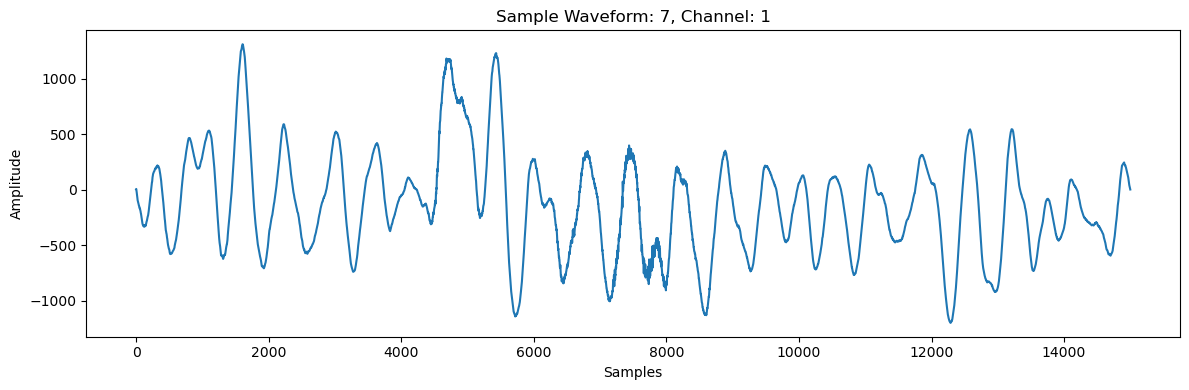

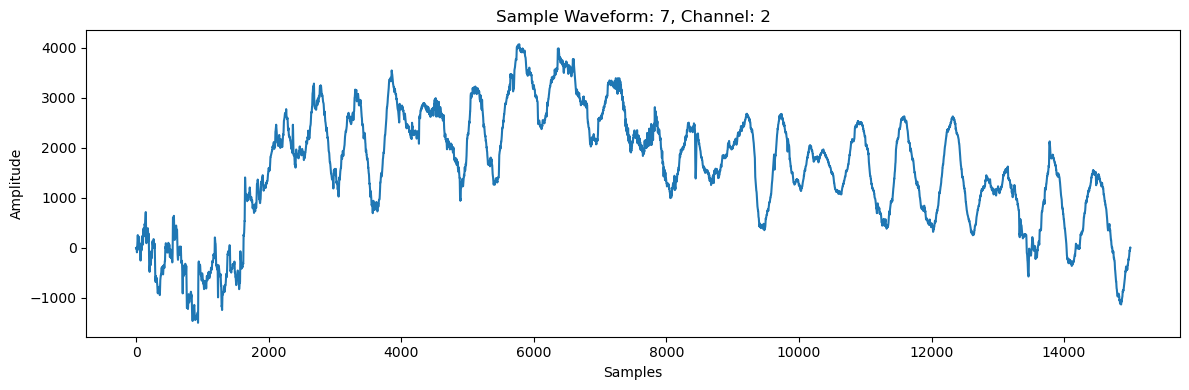

samplewaveform shape: (3, 15000)


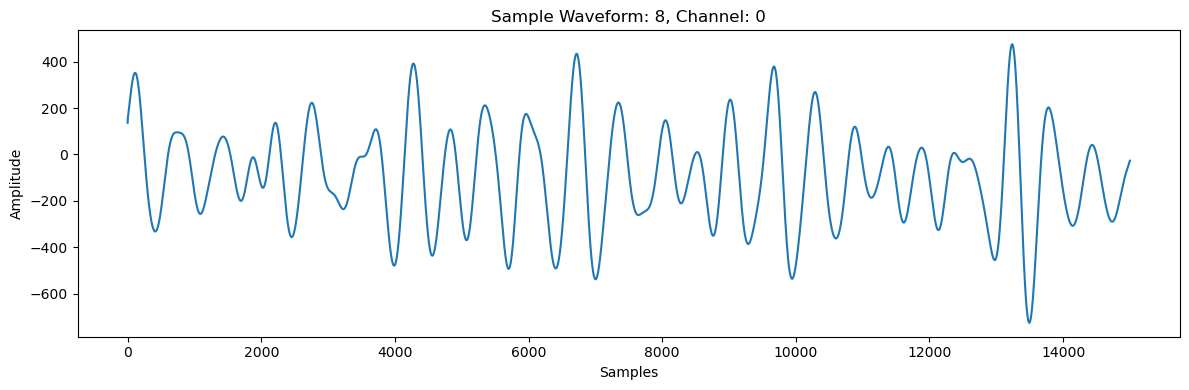

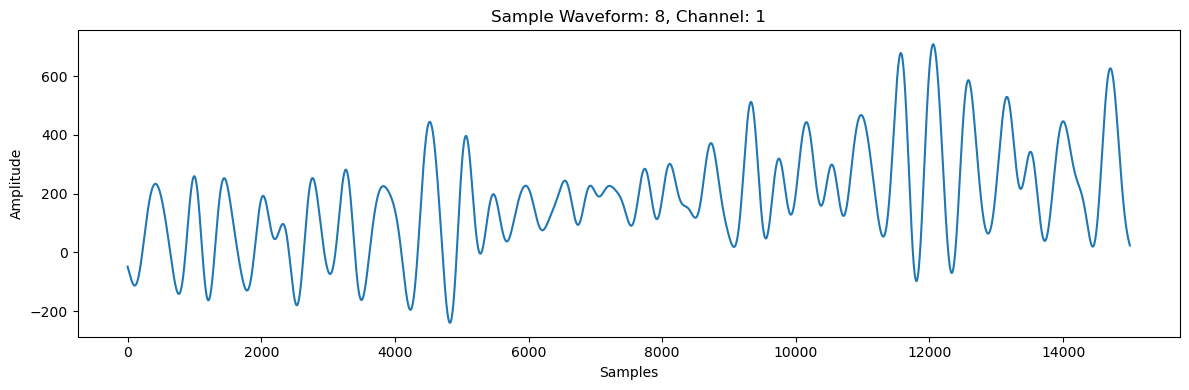

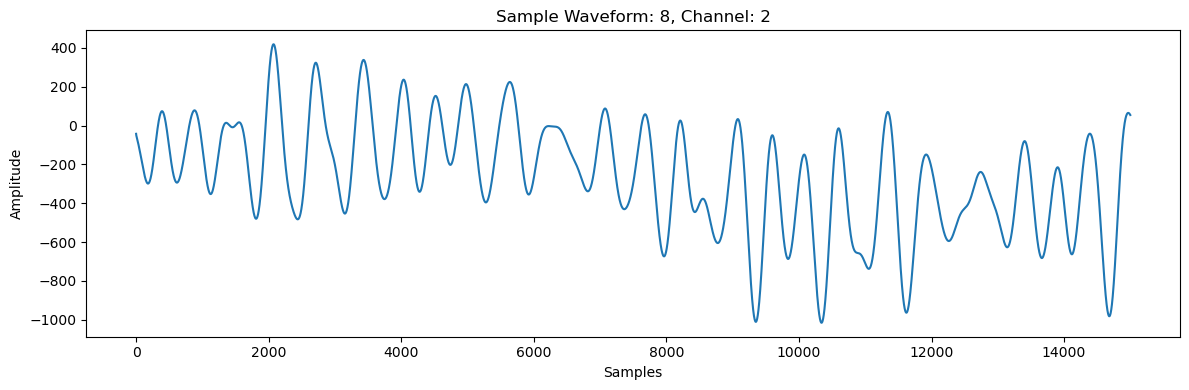

samplewaveform shape: (3, 15000)


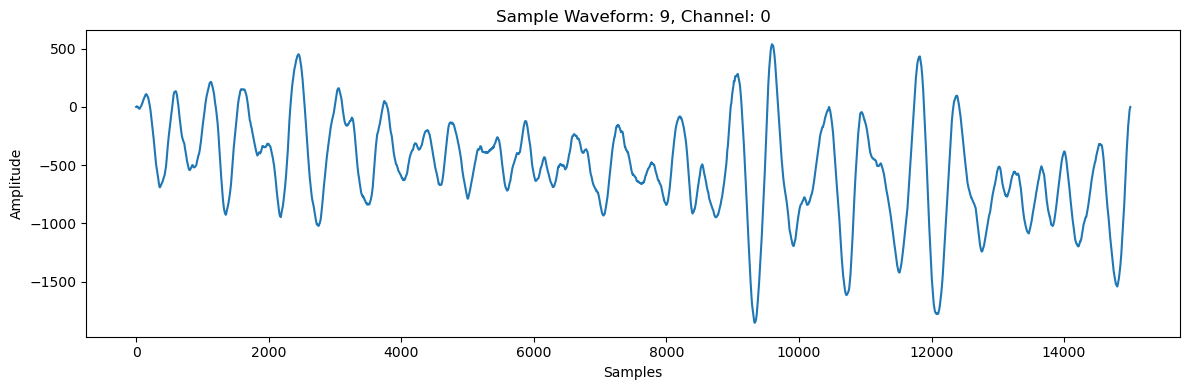

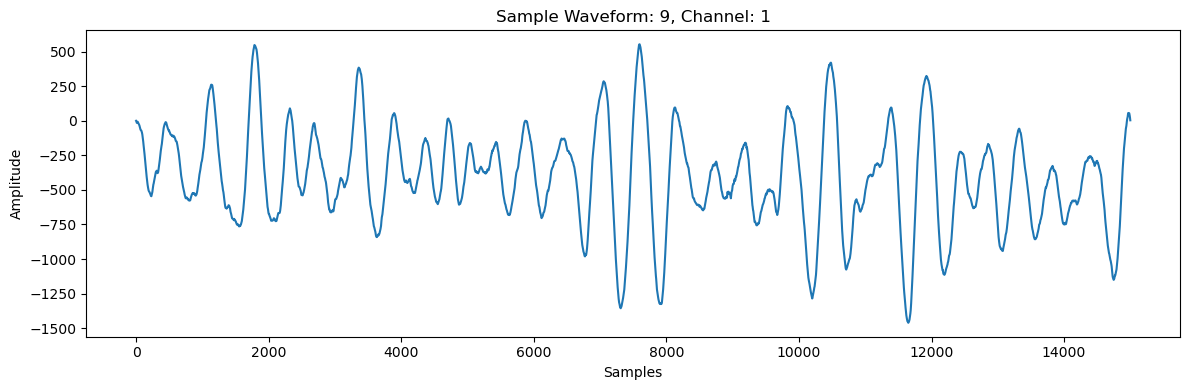

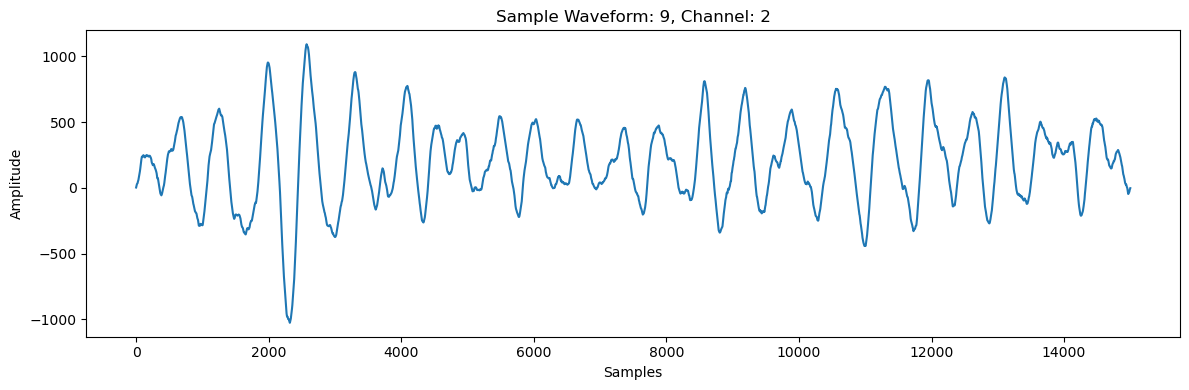

In [2]:
hdf5_test_path = "/home/hbito/cascadia_obs_ensemble_backup/data/datasets_all_regions/waveforms_HH_BH_on_the_fly.h5"
with h5py.File(hdf5_test_path, 'r') as f:
    print("Keys in HDF5 file:")
    for key in f.keys():
        print(f" - {key}")
    print(f['data'].keys())

    waveforms_group = f['data']

    for i, key in enumerate(list(waveforms_group.keys())[:]):
                waveform = waveforms_group[key][:]
                print(f" - {key}: shape={waveform.shape}, min={waveform.min():.2f}, max={waveform.max():.2f}")

    # Plot a sample waveform if matplotlib is available
    if list(waveforms_group.keys()):
        for j in range(len(list(waveforms_group.keys()))):
            sample_key = list(waveforms_group.keys())[j]
            sample_waveform = waveforms_group[sample_key][:]

            print('samplewaveform shape:', sample_waveform[0].shape)

            for i in range(len(sample_waveform[0])):
                plt.figure(figsize=(12, 4))
                y = sample_waveform[0,i,:]
                x = np.arange(len(y))
                plt.plot(x, y)
                plt.title(f"Sample Waveform: {sample_key}, Channel: {i}")
                plt.xlabel("Samples")
                plt.ylabel("Amplitude")
                plt.tight_layout()
                plt.show()


    

In [3]:
test = pd.read_csv('/home/hbito/cascadia_obs_ensemble_backup/data/datasets_all_regions/metadata_HH_BH_on_the_fly.csv')
test.iloc[:][['event_id','source_origin_time','source_latitude_deg','source_longitude_deg','source_depth_km','station_network_code','station_channel_code','station_code','station_location_code','station_latitude_deg','station_longitude_deg','station_elevation_m','trace_name','trace_name','trace_sampling_rate_hz', 'trace_start_time','trace_S_arrival_sample','trace_P_arrival_sample','trace_S_onset','trace_P_onset']]

,event_id,source_origin_time,source_latitude_deg,source_longitude_deg,source_depth_km,station_network_code,station_channel_code,station_code,station_location_code,station_latitude_deg,station_longitude_deg,station_elevation_m,trace_name,trace_name,trace_sampling_rate_hz,trace_start_time,trace_S_arrival_sample,trace_P_arrival_sample,trace_S_onset,trace_P_onset
0,ev1262304917_262282,2010-01-01T00:15:17.262282Z,47.22533,-122.16895,56.111,UW,BH,GNW,NaN,47.564130,-122.824980,220.0,"5$0,:3,:15000","5$0,:3,:15000",100,2010-01-01T00:14:27.262282Z,7473.0,NaN,impulsive,NaN
1,ev1262305009_37536,2010-01-01T00:16:49.375360Z,48.19518,-121.77276,3.820,CN,BH,HNB,NaN,49.274500,-122.579200,183.0,"5$1,:3,:15000","5$1,:3,:15000",100,2010-01-01T00:15:59.375360Z,8764.0,7134.0,impulsive,impulsive
2,ev1262305009_37536,2010-01-01T00:16:49.375360Z,48.19518,-121.77276,3.820,UW,BH,GNW,NaN,47.564130,-122.824980,220.0,"0$0,:3,:15000","0$0,:3,:15000",100,2010-01-01T00:15:59.375360Z,8069.0,NaN,impulsive,NaN
3,ev1262305009_37536,2010-01-01T00:16:49.375360Z,48.19518,-121.77276,3.820,UW,BH,PASS,NaN,48.998299,-122.085197,175.4,"4$0,:3,:15000","4$0,:3,:15000",100,2010-01-01T00:15:59.375360Z,7688.0,6535.0,impulsive,impulsive
4,ev1262330283_689209,2010-01-01T07:18:03.689209Z,47.86208,-122.09903,17.799,CN,BH,HNB,NaN,49.274500,-122.579200,183.0,"3$0,:3,:15000","3$0,:3,:15000",100,2010-01-01T07:17:13.689209Z,9294.0,NaN,impulsive,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388827,ev1435101498_841147,2015-06-23T23:18:18.841147Z,43.37085,-127.35251,5.915,7D,BH,G35D,NaN,42.555698,-126.399002,-2822.6,"2$35218,:3,:15000","2$35218,:3,:15000",100,2015-06-23T23:17:28.841147Z,7973.0,NaN,impulsive,NaN
388828,ev1435101498_841147,2015-06-23T23:18:18.841147Z,43.37085,-127.35251,5.915,7D,HH,J10D,NaN,43.348499,-125.545097,-3085.0,"4$35324,:3,:15000","4$35324,:3,:15000",100,2015-06-23T23:17:28.841147Z,8784.0,7052.0,impulsive,impulsive
388829,ev1435101498_841147,2015-06-23T23:18:18.841147Z,43.37085,-127.35251,5.915,7D,BH,J11D,NaN,43.541599,-126.368599,-3000.8,"7$35524,:3,:15000","7$35524,:3,:15000",100,2015-06-23T23:17:28.841147Z,7204.0,6208.0,impulsive,impulsive
388830,ev1435101498_841147,2015-06-23T23:18:18.841147Z,43.37085,-127.35251,5.915,7D,BH,J19D,NaN,44.179001,-126.271202,-2955.4,"0$35311,:3,:15000","0$35311,:3,:15000",100,2015-06-23T23:17:28.841147Z,8161.0,6751.0,impulsive,impulsive


In [88]:
len(test)

301

In [6]:
assoc_df = pd.read_csv('/home/hbito/cascadia_obs_ensemble_backup/data/datasets_all_regions/arrival_assoc_origin_2010_2015_reloc_cog_ver3.csv', index_col=0)
assoc_df.head()

,sta,pick_time,arid,iphase,prob,orid,phase,timeres,slatitude,slongitude,...,lon,depth,otime,nass,p_picks,s_picks,rms,nsphz,gap,algorithm
0,UW.PCMD,1.262305e+09,0,P,0.68,0,P,0.049,46.888962,-122.301483,...,-122.16895,56.111,1.262305e+09,7,2,5,1.081,5.0,235.831208,genie
1,UW.RVW,1.262305e+09,1,P,0.68,0,P,1.264,46.149750,-122.742996,...,-122.16895,56.111,1.262305e+09,7,2,5,1.081,5.0,235.831208,genie
2,UW.PCMD,1.262305e+09,2,S,0.68,0,S,-0.243,46.888962,-122.301483,...,-122.16895,56.111,1.262305e+09,7,2,5,1.081,5.0,235.831208,genie
3,UW.GNW,1.262305e+09,3,S,0.68,0,S,2.402,47.564130,-122.824980,...,-122.16895,56.111,1.262305e+09,7,2,5,1.081,5.0,235.831208,genie
4,PB.B013,1.262305e+09,4,S,0.68,0,S,-0.651,47.813000,-122.910797,...,-122.16895,56.111,1.262305e+09,7,2,5,1.081,5.0,235.831208,genie


In [7]:
assoc_df[['network', 'station']] = assoc_df['sta'].str.split('.', expand=True)
assoc_df['event_id'] = 'ev' + assoc_df['otime'].astype(str).str.replace('.', '_')
group_iter = assoc_df.groupby(['event_id', 'network', 'station'])
len(group_iter)

690488

In [67]:
from datetime import timedelta

In [68]:
timedelta(microseconds=1)

datetime.timedelta(microseconds=1)

In [3]:
test1 = pd.read_csv('/home/hbito/cascadia_obs_ensemble_backup/data/datasets_all_regions/save_errors_count_EH_events.csv')
test1

,event_id,num_sta,i_iter,network,station,starttime,endtime,stage,error
0,ev1262304917_262282,7,1,PB,B013,2010-01-01T00:14:27.262282Z,2010-01-01T00:16:57.262282Z,skipping for events with only EH chs,skipping for events with only EH chs
1,ev1262304917_262282,7,2,PB,B943,2010-01-01T00:14:27.262282Z,2010-01-01T00:16:57.262282Z,skipping for events with only EH chs,skipping for events with only EH chs
2,ev1262304917_262282,7,3,UW,BOW,2010-01-01T00:14:27.262282Z,2010-01-01T00:16:57.262282Z,skipping for events with only EH chs,skipping for events with only EH chs
3,ev1262304917_262282,7,5,UW,PCMD,2010-01-01T00:14:27.262282Z,2010-01-01T00:16:57.262282Z,skipping for events with only EH chs,skipping for events with only EH chs
4,ev1262304917_262282,7,6,UW,RVW,2010-01-01T00:14:27.262282Z,2010-01-01T00:16:57.262282Z,skipping for events with only EH chs,skipping for events with only EH chs
...,...,...,...,...,...,...,...,...,...
301631,ev1435084341_918122,15,690363,PB,B011,2015-06-23T18:31:31.918122Z,2015-06-23T18:34:01.918122Z,skipping for events with only EH chs,skipping for events with only EH chs
301632,ev1435084341_918122,15,690364,UW,MCW,2015-06-23T18:31:31.918122Z,2015-06-23T18:34:01.918122Z,skipping for events with only EH chs,skipping for events with only EH chs
301633,ev1435085729_206032,16,690368,CN,GOBB,2015-06-23T18:54:39.206032Z,2015-06-23T18:57:09.206032Z,skipping for events with only EH chs,skipping for events with only EH chs
301634,ev1435086054_37969,9,690404,PB,B011,2015-06-23T19:00:04.379690Z,2015-06-23T19:02:34.379690Z,skipping for events with only EH chs,skipping for events with only EH chs


In [5]:
test1[test1['stage']!='skipping for events with only EH chs']

,event_id,num_sta,i_iter,network,station,starttime,endtime,stage,error
136527,ev1322461834_66334,9,152997,NV,NC27,2011-11-28T06:29:44.663340Z,2011-11-28T06:32:14.663340Z,waveform_fetch,Can't merge traces with same ids but differing...
178035,ev1341100732_088423,60,223044,NV,NCBC,2012-06-30T23:58:02.088423Z,2012-07-01T00:00:32.088423Z,waveform_fetch,Can't merge traces with same ids but differing...
189469,ev1345502871_884253,6,243459,NV,NC27,2012-08-20T22:47:01.884253Z,2012-08-20T22:49:31.884253Z,waveform_fetch,Can't merge traces with same ids but differing...
226991,ev1370416518_538737,51,374601,NV,NC27,2013-06-05T07:14:28.538737Z,2013-06-05T07:16:58.538737Z,waveform_fetch,Can't merge traces with same ids but differing...
227015,ev1370430837_099317,55,374705,NV,NC27,2013-06-05T11:13:07.099317Z,2013-06-05T11:15:37.099317Z,waveform_fetch,Can't merge traces with same ids but differing...
240056,ev1389743997_861131,8,425854,NV,NCBC,2014-01-14T23:59:07.861131Z,2014-01-15T00:01:37.861131Z,waveform_fetch,Can't merge traces with same ids but differing...
272893,ev1411679682_85571,8,541146,NV,NC27,2014-09-25T21:13:52.855710Z,2014-09-25T21:16:22.855710Z,waveform_fetch,Can't merge traces with same ids but differing...


In [12]:
assoc_df[assoc_df['event_id']=='ev1262304917_262282']

,sta,pick_time,arid,iphase,prob,orid,phase,timeres,slatitude,slongitude,...,nass,p_picks,s_picks,rms,nsphz,gap,algorithm,network,station,event_id
0,UW.PCMD,1.262305e+09,0,P,0.68,0,P,0.049,46.888962,-122.301483,...,7,2,5,1.081,5.0,235.831208,genie,UW,PCMD,ev1262304917_262282
1,UW.RVW,1.262305e+09,1,P,0.68,0,P,1.264,46.149750,-122.742996,...,7,2,5,1.081,5.0,235.831208,genie,UW,RVW,ev1262304917_262282
2,UW.PCMD,1.262305e+09,2,S,0.68,0,S,-0.243,46.888962,-122.301483,...,7,2,5,1.081,5.0,235.831208,genie,UW,PCMD,ev1262304917_262282
3,UW.GNW,1.262305e+09,3,S,0.68,0,S,2.402,47.564130,-122.824980,...,7,2,5,1.081,5.0,235.831208,genie,UW,GNW,ev1262304917_262282
4,PB.B013,1.262305e+09,4,S,0.68,0,S,-0.651,47.813000,-122.910797,...,7,2,5,1.081,5.0,235.831208,genie,PB,B013,ev1262304917_262282
5,PB.B943,1.262305e+09,5,S,0.68,0,S,-0.511,47.813202,-122.911301,...,7,2,5,1.081,5.0,235.831208,genie,PB,B943,ev1262304917_262282
6,UW.BOW,1.262305e+09,6,S,0.68,0,S,-0.263,46.474831,-123.229301,...,7,2,5,1.081,5.0,235.831208,genie,UW,BOW,ev1262304917_262282


### Verify the test datasets for EH

Keys in HDF5 file:
 - data
f['data'].keys() <KeysViewHDF5 ['0', '1', '10', '2', '3', '4', '5', '6', '7', '8', '9']>
 - 0: shape=(28, 1, 14998), min=-5441.53, max=6794.99
 - 1: shape=(44, 1, 14998), min=-2412.63, max=3304.96
 - 10: shape=(43, 1, 14998), min=-6644.83, max=6889.11
 - 2: shape=(44, 1, 14998), min=-38004.95, max=14835.46
 - 3: shape=(44, 1, 14998), min=-25541.45, max=10659.71
 - 4: shape=(38, 1, 14998), min=-10491.40, max=2520.34
 - 5: shape=(47, 1, 14998), min=-2428.38, max=2054.78
 - 6: shape=(37, 1, 14998), min=-15931.30, max=12717.25
 - 7: shape=(45, 1, 14998), min=-10304.41, max=11613.59
 - 8: shape=(57, 1, 14998), min=-8268.68, max=7267.23
 - 9: shape=(40, 1, 14998), min=-5064.24, max=3664.54
samplewaveform shape: (1, 14998)


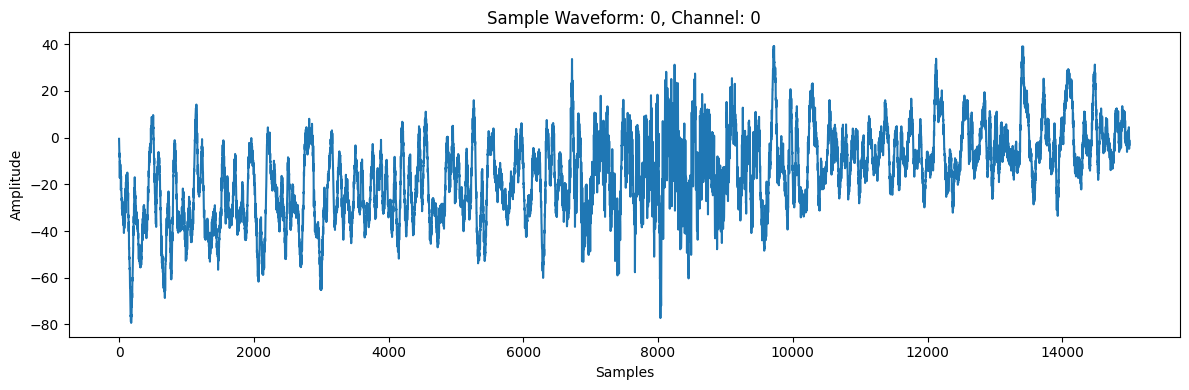

In [5]:
hdf5_test_path = "/wd1/hbito_data/data/datasets_all_regions/waveforms_EH_test1.h5"
with h5py.File(hdf5_test_path, 'r') as f:
    print("Keys in HDF5 file:")
    for key in f.keys():
        print(f" - {key}")
    print("f['data'].keys()",f['data'].keys())

    waveforms_group = f['data']

    for i, key in enumerate(list(waveforms_group.keys())[:]):
                waveform = waveforms_group[key][:]
                print(f" - {key}: shape={waveform.shape}, min={waveform.min():.2f}, max={waveform.max():.2f}")

    # Plot a sample waveform if matplotlib is available
    if list(waveforms_group.keys()):
        sample_key = list(waveforms_group.keys())[0]
        sample_waveform = waveforms_group[sample_key][:]

        print('samplewaveform shape:', sample_waveform[0].shape)

        for i in range(len(sample_waveform[0])):
            plt.figure(figsize=(12, 4))
            y = sample_waveform[0,i,:]
            x = np.arange(len(y))
            plt.plot(x, y)
            plt.title(f"Sample Waveform: {sample_key}, Channel: {i}")
            plt.xlabel("Samples")
            plt.ylabel("Amplitude")
            plt.tight_layout()
            plt.show()
        


In [6]:
test = pd.read_csv('/wd1/hbito_data/data/datasets_all_regions/metadata_EH_test1.csv')
test.iloc[0:20][['event_id','source_origin_time','source_latitude_deg','source_longitude_deg','source_depth_km','station_network_code','station_channel_code','station_code','station_location_code','station_latitude_deg','station_longitude_deg','station_elevation_m','trace_name','trace_name','trace_sampling_rate_hz', 'trace_start_time','trace_S_arrival_sample','trace_P_arrival_sample','trace_S_onset','trace_P_onset']]

,event_id,source_origin_time,source_latitude_deg,source_longitude_deg,source_depth_km,station_network_code,station_channel_code,station_code,station_location_code,station_latitude_deg,station_longitude_deg,station_elevation_m,trace_name,trace_name,trace_sampling_rate_hz,trace_start_time,trace_S_arrival_sample,trace_P_arrival_sample,trace_S_onset,trace_P_onset
0,ev1262304917_262282,2010-01-01T00:15:17.262282Z,47.22533,-122.16895,56111.0,PB,EH,B013,NaN,47.813000,-122.910797,75.3,"8$0,:1,:14998","8$0,:1,:14998",100,2010-01-01T00:14:27.262282Z,7635.0,NaN,impulsive,NaN
1,ev1262304917_262282,2010-01-01T00:15:17.262282Z,47.22533,-122.16895,56111.0,PB,EH,B943,NaN,47.813202,-122.911301,84.2,"3$0,:1,:14998","3$0,:1,:14998",100,2010-01-01T00:14:27.262282Z,7650.0,NaN,impulsive,NaN
2,ev1262304917_262282,2010-01-01T00:15:17.262282Z,47.22533,-122.16895,56111.0,UW,EH,BOW,NaN,46.474831,-123.229301,870.0,"5$0,:1,:14998","5$0,:1,:14998",100,2010-01-01T00:14:27.262282Z,8079.0,NaN,impulsive,NaN
3,ev1262304917_262282,2010-01-01T00:15:17.262282Z,47.22533,-122.16895,56111.0,UW,EH,PCMD,NaN,46.888962,-122.301483,239.0,"3$1,:1,:14998","3$1,:1,:14998",100,2010-01-01T00:14:27.262282Z,6601.0,5991.0,impulsive,impulsive
4,ev1262304917_262282,2010-01-01T00:15:17.262282Z,47.22533,-122.16895,56111.0,UW,EH,RVW,NaN,46.149750,-122.742996,504.0,"4$0,:1,:14998","4$0,:1,:14998",100,2010-01-01T00:14:27.262282Z,NaN,7057.0,NaN,impulsive
5,ev1262305009_37536,2010-01-01T00:16:49.375360Z,48.19518,-121.77276,3820.0,CN,EH,BIB,NaN,49.410300,-123.310500,38.0,"10$0,:1,:14998","10$0,:1,:14998",100,2010-01-01T00:15:59.375360Z,9863.0,7772.0,impulsive,impulsive
6,ev1262305009_37536,2010-01-01T00:16:49.375360Z,48.19518,-121.77276,3820.0,CN,EH,GOBB,NaN,48.949300,-123.510500,173.0,"9$0,:1,:14998","9$0,:1,:14998",100,2010-01-01T00:15:59.375360Z,9425.0,7508.0,impulsive,impulsive
7,ev1262305009_37536,2010-01-01T00:16:49.375360Z,48.19518,-121.77276,3820.0,CN,EH,VDB,NaN,49.026100,-122.102800,404.0,"3$2,:1,:14998","3$2,:1,:14998",100,2010-01-01T00:15:59.375360Z,NaN,6577.0,NaN,impulsive
8,ev1262305009_37536,2010-01-01T00:16:49.375360Z,48.19518,-121.77276,3820.0,CN,EH,WPB,NaN,49.647800,-123.209400,260.0,"8$1,:1,:14998","8$1,:1,:14998",100,2010-01-01T00:15:59.375360Z,10283.0,8011.0,impulsive,impulsive
9,ev1262305009_37536,2010-01-01T00:16:49.375360Z,48.19518,-121.77276,3820.0,PB,EH,B001,NaN,48.043072,-123.131409,237.0,"9$1,:1,:14998","9$1,:1,:14998",100,2010-01-01T00:15:59.375360Z,8086.0,6763.0,impulsive,impulsive
